In [74]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [75]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import string
import os
import networkx as nx
import networkx as nx
import numpy as np
from node2vec import Node2Vec
#from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v

In [76]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import string
import os
import networkx as nx
import networkx as nx
import numpy as np
from node2vec import Node2Vec
#from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt


In [77]:
#loading dataset
df=pd.read_csv('newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [78]:
df.shape

(1470, 35)

In [79]:
df.shape

(1470, 35)

In [80]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [81]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [82]:
df = df.drop(['Over18', 'EmployeeCount',	'EmployeeNumber', 'StandardHours'], axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [83]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [84]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

In [85]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [86]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [87]:
numerical = df.select_dtypes(include=['float64','int64'])

In [88]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


In [89]:
continious = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]

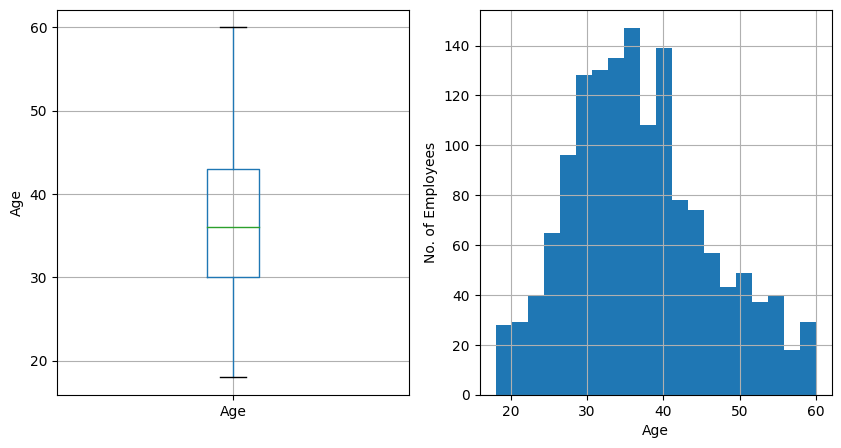

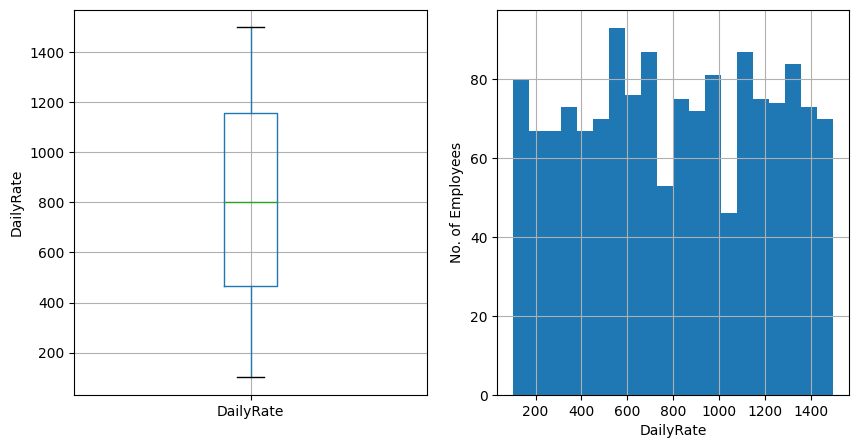

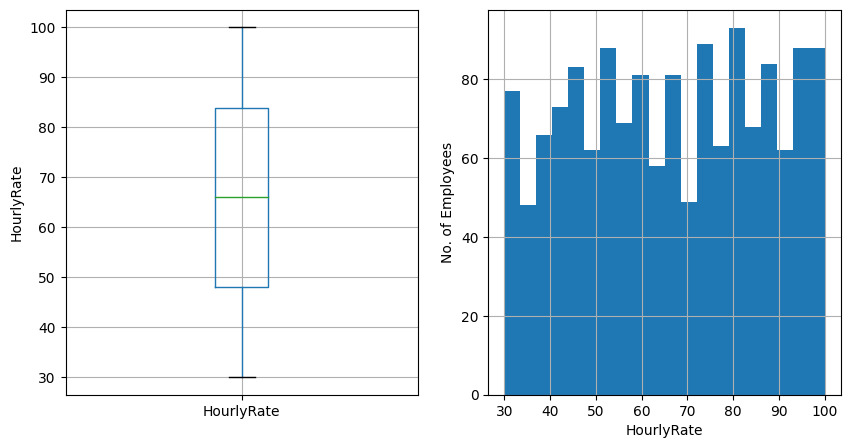

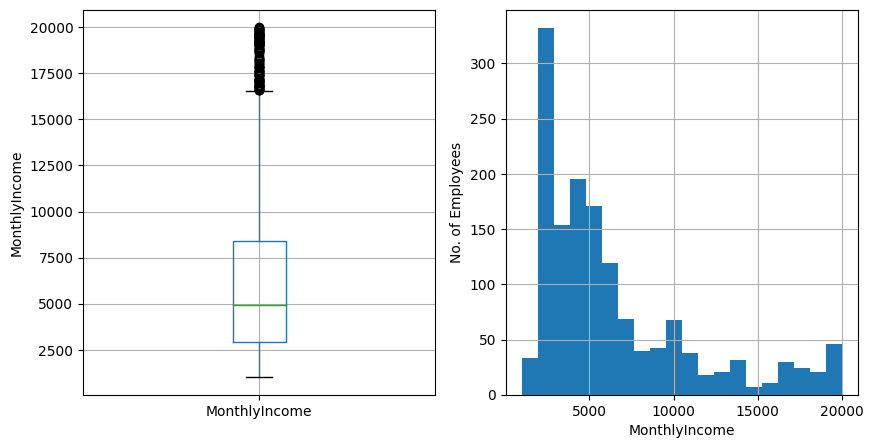

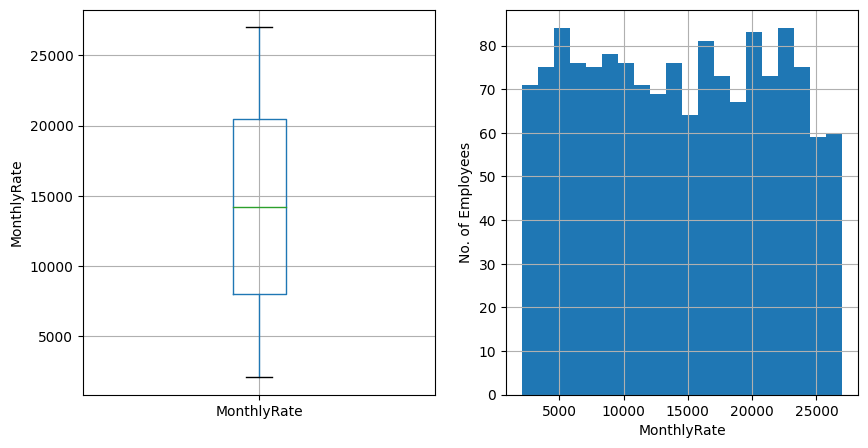

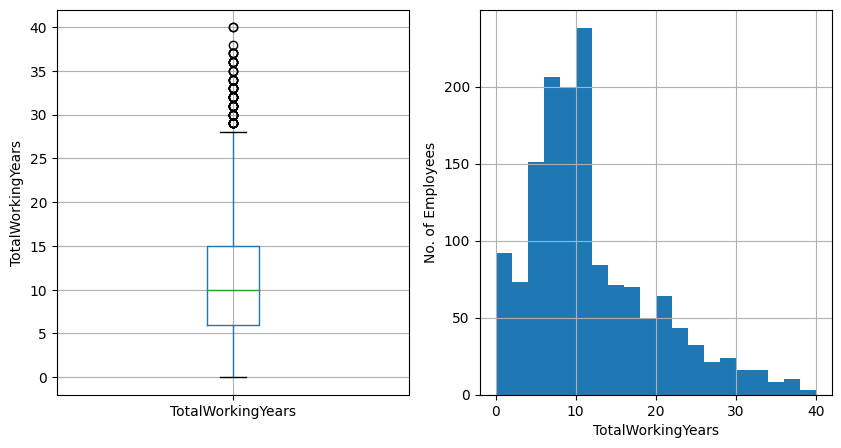

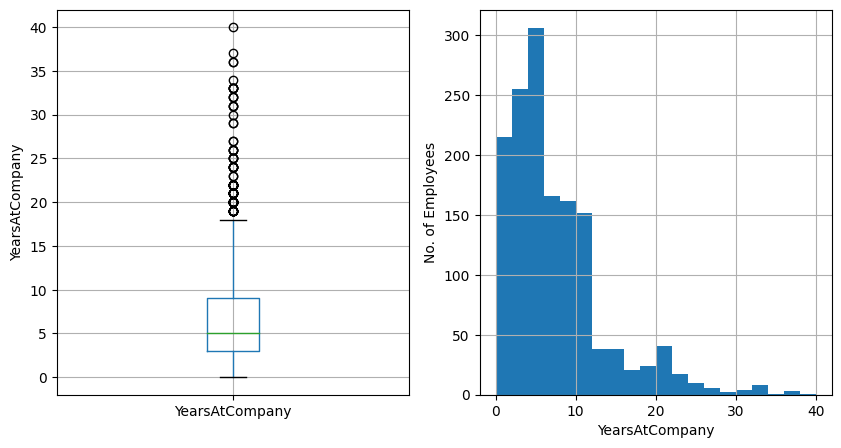

In [90]:
for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = numerical.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = numerical[var].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(var)
    
    plt.show()
    

In [91]:
"""numerical.loc[numerical['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000
numerical.loc[numerical['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28
numerical.loc[numerical['YearsAtCompany']>18, 'YearsAtCompany'] = 18
numerical.head()"""

"numerical.loc[numerical['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000\nnumerical.loc[numerical['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28\nnumerical.loc[numerical['YearsAtCompany']>18, 'YearsAtCompany'] = 18\nnumerical.head()"

In [92]:
df.loc[df['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000
df.loc[df['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28
df.loc[df['YearsAtCompany']>18, 'YearsAtCompany'] = 18
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [93]:
categorical = df.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [94]:
df_cat = pd.get_dummies(categorical)
df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [95]:
df = df.drop([
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 
 'OverTime'], axis = 1)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


In [96]:
df1 = pd.concat([df,df_cat], axis=1)
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [97]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRol

In [98]:
df1 = df1.drop(['BusinessTravel_Non-Travel', 'Department_Human Resources', 'EducationField_Other',
                'EducationField_Human Resources', 'JobRole_Human Resources', 'JobRole_Healthcare Representative', 'JobRole_Research Director', 'JobRole_Sales Representative',
                'JobRole_Manager', 'MaritalStatus_Divorced'], axis = 1)
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender_Female,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,0,0,0,1,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,1,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,1,1,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,1,0,0,0,1,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,1,1,0,0,0,1,0,1,0


In [99]:
scale_data=[feature for feature in df1.columns if feature not in ['Attrition']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
df1[scale_data]=scaler.fit_transform(df1[scale_data])
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender_Female,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [100]:
df1.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition                            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rar

In [101]:
u3 = df1.drop(['Attrition'], axis = 1)
u3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender_Female,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [102]:
#node_Class
node_Class = df1["Attrition"]

In [103]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'cosine')
s

array([[0.        , 0.68449588, 0.41441984, ..., 0.51649405, 0.5469911 ,
        0.61578385],
       [0.68449588, 0.        , 0.56480676, ..., 0.3444341 , 0.32860922,
        0.42142739],
       [0.41441984, 0.56480676, 0.        , ..., 0.39885004, 0.56883656,
        0.31745932],
       ...,
       [0.51649405, 0.3444341 , 0.39885004, ..., 0.        , 0.58911591,
        0.35904857],
       [0.5469911 , 0.32860922, 0.56883656, ..., 0.58911591, 0.        ,
        0.38584704],
       [0.61578385, 0.42142739, 0.31745932, ..., 0.35904857, 0.38584704,
        0.        ]])

In [104]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,0.684496,0.414420,0.449013,0.671591,0.512400,0.493079,0.573221,0.616878,0.538005,...,0.541895,0.426018,0.392436,0.690485,0.385455,0.692335,0.655903,0.516494,0.546991,0.615784
1,0.684496,0.000000,0.564807,0.297856,0.399238,0.292533,0.509918,0.302326,0.224592,0.357901,...,0.510576,0.588519,0.570045,0.436742,0.548548,0.282390,0.327080,0.344434,0.328609,0.421427
2,0.414420,0.564807,0.000000,0.470331,0.380179,0.292183,0.348937,0.295389,0.480073,0.369079,...,0.465905,0.439022,0.685305,0.449231,0.459371,0.402018,0.428915,0.398850,0.568837,0.317459
3,0.449013,0.297856,0.470331,0.000000,0.556983,0.363592,0.403275,0.497463,0.462641,0.449620,...,0.459369,0.586300,0.564915,0.632269,0.474205,0.393884,0.503477,0.422375,0.449865,0.498464
4,0.671591,0.399238,0.380179,0.556983,0.000000,0.415106,0.370258,0.343366,0.577040,0.198517,...,0.496844,0.580351,0.576431,0.409504,0.527371,0.187060,0.206540,0.449531,0.394585,0.133708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.692335,0.282390,0.402018,0.393884,0.187060,0.237960,0.386522,0.296670,0.345039,0.185812,...,0.470547,0.548245,0.509726,0.353700,0.524023,0.000000,0.259949,0.470797,0.254549,0.161541
1466,0.655903,0.327080,0.428915,0.503477,0.206540,0.453019,0.375219,0.354120,0.422616,0.130987,...,0.373954,0.429956,0.441752,0.316958,0.496285,0.259949,0.000000,0.425562,0.314768,0.176759
1467,0.516494,0.344434,0.398850,0.422375,0.449531,0.487108,0.338852,0.322567,0.339222,0.381456,...,0.621220,0.507566,0.618881,0.410317,0.667327,0.470797,0.425562,0.000000,0.589116,0.359049
1468,0.546991,0.328609,0.568837,0.449865,0.394585,0.381122,0.552266,0.538063,0.438268,0.305326,...,0.532367,0.399427,0.397261,0.417102,0.427593,0.254549,0.314768,0.589116,0.000000,0.385847


In [105]:
# taking average of the hamming distance matrix
y = np.average(X1)
y

0.42374357200798884

In [106]:
adjmat_df=X1.copy()

In [107]:
# setting threshold value as mean of hamming matrix
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [108]:
# adjacency matrix
adjmat_df

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1466,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1468,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [109]:
B=np.matrix(adjmat_df)
B

matrix([[0., 1., 0., ..., 1., 1., 1.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [110]:
H=nx.from_numpy_matrix(B)
H

In [111]:
node2vec = Node2Vec(H, dimensions=32, walk_length=10, num_walks=100, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
ge = pd.DataFrame([model.wv.word_vec(str(n)) for n in H.nodes()], index = H.nodes)
print('Graph Embedding:\n', ge)

Generating walks (CPU: 4): 100%|██████████| 25/25 [00:54<00:00,  2.18s/it]

Graph Embedding:
             0         1         2         3         4         5         6   \
0     0.200109 -0.277121 -0.050447  0.200306  0.170112 -0.433061 -0.043349   
1    -0.063975  0.023408 -0.291985 -0.026427  0.076352 -0.154708 -0.023188   
2     0.193062 -0.042409 -0.352761  0.431099 -0.083768 -0.224314  0.289327   
3     0.143875 -0.210183 -0.123732  0.203596  0.191258 -0.250905 -0.242343   
4    -0.354354 -0.067946 -0.314779  0.203974 -0.117214 -0.243601 -0.049224   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.176553 -0.017076 -0.384567  0.020628  0.125227 -0.487714 -0.073137   
1466 -0.321940 -0.170794  0.049568 -0.061352  0.136881 -0.241309  0.026408   
1467 -0.164848  0.158000 -0.351552  0.085470  0.136631 -0.222245  0.016521   
1468 -0.023731 -0.039702 -0.166657  0.032940 -0.152699 -0.153306 -0.229175   
1469 -0.261515 -0.114442 -0.093708  0.181311 -0.135959 -0.009313 -0.103283   

            7         8         9   ...      

/tmp/ipykernel_3074/4252383203.py:3: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  ge = pd.DataFrame([model.wv.word_vec(str(n)) for n in H.nodes()], index = H.nodes)


In [112]:
node_emb=pd.DataFrame(ge)
node_emb

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.200109,-0.277121,-0.050447,0.200306,0.170112,-0.433061,-0.043349,0.085626,-0.293414,0.100899,...,0.026922,0.020673,-0.118963,-0.124624,0.049570,0.099943,-0.038962,-0.316097,-0.034386,0.131975
1,-0.063975,0.023408,-0.291985,-0.026427,0.076352,-0.154708,-0.023188,0.131985,0.085746,-0.011019,...,0.196769,-0.357228,-0.257812,-0.225621,-0.258614,-0.228399,-0.102746,-0.288608,0.146857,0.175368
2,0.193062,-0.042409,-0.352761,0.431099,-0.083768,-0.224314,0.289327,-0.148270,-0.201376,0.095815,...,-0.278246,0.104466,-0.235935,-0.142956,-0.377566,0.098342,-0.010798,-0.362502,0.088680,-0.031474
3,0.143875,-0.210183,-0.123732,0.203596,0.191258,-0.250905,-0.242343,-0.067425,-0.252795,-0.060856,...,-0.277279,-0.181307,-0.104356,-0.172823,0.068268,0.130253,-0.485184,-0.208269,-0.050683,-0.185606
4,-0.354354,-0.067946,-0.314779,0.203974,-0.117214,-0.243601,-0.049224,0.200190,-0.229942,0.156927,...,-0.146855,-0.339607,-0.143386,-0.312433,-0.661251,0.131047,-0.243359,-0.008289,-0.063397,0.164948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.176553,-0.017076,-0.384567,0.020628,0.125227,-0.487714,-0.073137,0.254337,0.032018,0.129549,...,-0.096776,-0.197023,0.150350,-0.029129,-0.835446,-0.012054,-0.244374,-0.026266,0.074759,0.025835
1466,-0.321940,-0.170794,0.049568,-0.061352,0.136881,-0.241309,0.026408,-0.013628,0.017556,0.195783,...,-0.149201,-0.191430,-0.345198,-0.296223,-0.723486,-0.152299,-0.236202,-0.187328,0.025819,0.007318
1467,-0.164848,0.158000,-0.351552,0.085470,0.136631,-0.222245,0.016521,-0.154245,-0.152107,-0.144416,...,-0.237675,-0.340985,-0.174862,-0.033483,-0.014029,0.104638,-0.127709,-0.303757,-0.044517,0.064653
1468,-0.023731,-0.039702,-0.166657,0.032940,-0.152699,-0.153306,-0.229175,0.279207,-0.251810,0.124222,...,0.297909,-0.130967,0.048701,0.031889,-0.325591,0.382366,-0.011392,-0.297271,-0.003768,0.266163


In [113]:
node_emb['Class'] = node_Class

In [114]:
node_emb

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Class
0,0.200109,-0.277121,-0.050447,0.200306,0.170112,-0.433061,-0.043349,0.085626,-0.293414,0.100899,...,0.020673,-0.118963,-0.124624,0.049570,0.099943,-0.038962,-0.316097,-0.034386,0.131975,1
1,-0.063975,0.023408,-0.291985,-0.026427,0.076352,-0.154708,-0.023188,0.131985,0.085746,-0.011019,...,-0.357228,-0.257812,-0.225621,-0.258614,-0.228399,-0.102746,-0.288608,0.146857,0.175368,0
2,0.193062,-0.042409,-0.352761,0.431099,-0.083768,-0.224314,0.289327,-0.148270,-0.201376,0.095815,...,0.104466,-0.235935,-0.142956,-0.377566,0.098342,-0.010798,-0.362502,0.088680,-0.031474,1
3,0.143875,-0.210183,-0.123732,0.203596,0.191258,-0.250905,-0.242343,-0.067425,-0.252795,-0.060856,...,-0.181307,-0.104356,-0.172823,0.068268,0.130253,-0.485184,-0.208269,-0.050683,-0.185606,0
4,-0.354354,-0.067946,-0.314779,0.203974,-0.117214,-0.243601,-0.049224,0.200190,-0.229942,0.156927,...,-0.339607,-0.143386,-0.312433,-0.661251,0.131047,-0.243359,-0.008289,-0.063397,0.164948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.176553,-0.017076,-0.384567,0.020628,0.125227,-0.487714,-0.073137,0.254337,0.032018,0.129549,...,-0.197023,0.150350,-0.029129,-0.835446,-0.012054,-0.244374,-0.026266,0.074759,0.025835,0
1466,-0.321940,-0.170794,0.049568,-0.061352,0.136881,-0.241309,0.026408,-0.013628,0.017556,0.195783,...,-0.191430,-0.345198,-0.296223,-0.723486,-0.152299,-0.236202,-0.187328,0.025819,0.007318,0
1467,-0.164848,0.158000,-0.351552,0.085470,0.136631,-0.222245,0.016521,-0.154245,-0.152107,-0.144416,...,-0.340985,-0.174862,-0.033483,-0.014029,0.104638,-0.127709,-0.303757,-0.044517,0.064653,0
1468,-0.023731,-0.039702,-0.166657,0.032940,-0.152699,-0.153306,-0.229175,0.279207,-0.251810,0.124222,...,-0.130967,0.048701,0.031889,-0.325591,0.382366,-0.011392,-0.297271,-0.003768,0.266163,0


In [117]:
node_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Class
0,0.200109,-0.277121,-0.050447,0.200306,0.170112,-0.433061,-0.043349,0.085626,-0.293414,0.100899,...,0.020673,-0.118963,-0.124624,0.049570,0.099943,-0.038962,-0.316097,-0.034386,0.131975,1
1,-0.063975,0.023408,-0.291985,-0.026427,0.076352,-0.154708,-0.023188,0.131985,0.085746,-0.011019,...,-0.357228,-0.257812,-0.225621,-0.258614,-0.228399,-0.102746,-0.288608,0.146857,0.175368,0
2,0.193062,-0.042409,-0.352761,0.431099,-0.083768,-0.224314,0.289327,-0.148270,-0.201376,0.095815,...,0.104466,-0.235935,-0.142956,-0.377566,0.098342,-0.010798,-0.362502,0.088680,-0.031474,1
3,0.143875,-0.210183,-0.123732,0.203596,0.191258,-0.250905,-0.242343,-0.067425,-0.252795,-0.060856,...,-0.181307,-0.104356,-0.172823,0.068268,0.130253,-0.485184,-0.208269,-0.050683,-0.185606,0
4,-0.354354,-0.067946,-0.314779,0.203974,-0.117214,-0.243601,-0.049224,0.200190,-0.229942,0.156927,...,-0.339607,-0.143386,-0.312433,-0.661251,0.131047,-0.243359,-0.008289,-0.063397,0.164948,0


In [116]:
u3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender_Female,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [121]:
u3.shape

(1470, 41)

In [122]:
node_emb.shape

(1470, 33)

In [119]:
from itertools import product

In [123]:
emb = pd.concat([u3, node_emb], axis =1)
emb.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,23,24,25,26,27,28,29,30,31,Class
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.020673,-0.118963,-0.124624,0.049570,0.099943,-0.038962,-0.316097,-0.034386,0.131975,1
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,-0.357228,-0.257812,-0.225621,-0.258614,-0.228399,-0.102746,-0.288608,0.146857,0.175368,0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.104466,-0.235935,-0.142956,-0.377566,0.098342,-0.010798,-0.362502,0.088680,-0.031474,1
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,-0.181307,-0.104356,-0.172823,0.068268,0.130253,-0.485184,-0.208269,-0.050683,-0.185606,0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,-0.339607,-0.143386,-0.312433,-0.661251,0.131047,-0.243359,-0.008289,-0.063397,0.164948,0


In [124]:
X = emb.drop(['Class'], axis = 1)
Y = emb['Class']

In [132]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,22,23,24,25,26,27,28,29,30,31
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.026922,0.020673,-0.118963,-0.124624,0.049570,0.099943,-0.038962,-0.316097,-0.034386,0.131975
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.196769,-0.357228,-0.257812,-0.225621,-0.258614,-0.228399,-0.102746,-0.288608,0.146857,0.175368
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,-0.278246,0.104466,-0.235935,-0.142956,-0.377566,0.098342,-0.010798,-0.362502,0.088680,-0.031474
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,-0.277279,-0.181307,-0.104356,-0.172823,0.068268,0.130253,-0.485184,-0.208269,-0.050683,-0.185606
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,-0.146855,-0.339607,-0.143386,-0.312433,-0.661251,0.131047,-0.243359,-0.008289,-0.063397,0.164948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.104196,...,-0.096776,-0.197023,0.150350,-0.029129,-0.835446,-0.012054,-0.244374,-0.026266,0.074759,0.025835
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.599159,...,-0.149201,-0.191430,-0.345198,-0.296223,-0.723486,-0.152299,-0.236202,-0.187328,0.025819,0.007318
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.342405,...,-0.237675,-0.340985,-0.174862,-0.033483,-0.014029,0.104638,-0.127709,-0.303757,-0.044517,0.064653
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.292242,...,0.297909,-0.130967,0.048701,0.031889,-0.325591,0.382366,-0.011392,-0.297271,-0.003768,0.266163


In [134]:
X.rename(columns={x:y for x,y in zip(X.columns,range(0,len(X.columns)))}, inplace=True)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.026922,0.020673,-0.118963,-0.124624,0.049570,0.099943,-0.038962,-0.316097,-0.034386,0.131975
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.196769,-0.357228,-0.257812,-0.225621,-0.258614,-0.228399,-0.102746,-0.288608,0.146857,0.175368
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,-0.278246,0.104466,-0.235935,-0.142956,-0.377566,0.098342,-0.010798,-0.362502,0.088680,-0.031474
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,-0.277279,-0.181307,-0.104356,-0.172823,0.068268,0.130253,-0.485184,-0.208269,-0.050683,-0.185606
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,-0.146855,-0.339607,-0.143386,-0.312433,-0.661251,0.131047,-0.243359,-0.008289,-0.063397,0.164948


In [143]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
#import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [62]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.5 MB/s eta 0:00:00:00:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [151]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[178  69]
 [ 11  36]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       247
           1       0.34      0.77      0.47        47

    accuracy                           0.73       294
   macro avg       0.64      0.74      0.65       294
weighted avg       0.85      0.73      0.76       294

accuracy_score:  0.7278911564625851


In [152]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[242   5]
 [ 26  21]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       247
           1       0.81      0.45      0.58        47

    accuracy                           0.89       294
   macro avg       0.86      0.71      0.76       294
weighted avg       0.89      0.89      0.88       294

accuracy_score:  0.8945578231292517


In [153]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[246   1]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294

accuracy_score:  0.8571428571428571


In [154]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lr.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8829931972789116
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1233
           1       0.75      0.41      0.53       237

    accuracy                           0.88      1470
   macro avg       0.82      0.69      0.73      1470
weighted avg       0.87      0.88      0.87      1470

Confusion matrix:  [[1201   32]
 [ 140   97]]


In [155]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lsvm.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lsvm.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8850340136054422
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1233
           1       0.75      0.43      0.55       237

    accuracy                           0.89      1470
   macro avg       0.82      0.70      0.74      1470
weighted avg       0.87      0.89      0.87      1470

Confusion matrix:  [[1199   34]
 [ 135  102]]


In [156]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    pa.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(pa.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.7965986394557824
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1233
           1       0.39      0.44      0.41       237

    accuracy                           0.80      1470
   macro avg       0.64      0.65      0.64      1470
weighted avg       0.81      0.80      0.80      1470

Confusion matrix:  [[1067  166]
 [ 133  104]]


In [158]:
rf = RandomForestClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rf.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(rf.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8585034013605443
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.84      0.15      0.26       237

    accuracy                           0.86      1470
   macro avg       0.85      0.57      0.59      1470
weighted avg       0.86      0.86      0.81      1470

Confusion matrix:  [[1226    7]
 [ 201   36]]
